In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from collections import defaultdict as dd
from nltk.probability import FreqDist as fd
import dill as pickle
import numpy as np
from numpy.linalg import norm
from scipy.stats import entropy as H
from itertools import combinations
from collections import defaultdict as dd
from nltk.probability import FreqDist as fd
from nltk.corpus import stopwords, wordnet
import math

In [7]:
#adapted from alemol @ https://stackoverflow.com/questions/15880133/jensen-shannon-divergence
#identical dists have divergence of zero
def JSD(prob_distributions, weights, dist_weights, logbase=2):
    wprobs=[i*j for i,j in zip(weights, prob_distributions)]
    mixture=sum(wprobs)
    entropy_of_mixture=H(mixture, base=logbase)
    entropies=[H(i) for i in prob_distributions]
    wentropies=[i*j for i,j in zip(dist_weights, entropies)]
    divergence=entropy_of_mixture-sum(wentropies)
    return(divergence)

In [4]:
direc="/home/benjamin/sfi/project_stuff/data/clean/"
months=["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
site_list=["atlantic","breitbart","thehill","motherjones"]
year="2016"
d=[[] for x in range(7)]
for month in months:
    f=open(direc+month+year+"stats.pkl","rb")
    a=pickle.load(f)
    words=set()
    for site in site_list:
        words=words.union(set(a[0][site][year][month].keys()))
    probs=[[a[0][site][year][month].freq(word) for word in words] for site in site_list]
    for a,i in enumerate(combinations(range(4),2)):
        j,k=i
        p_dists=np.array([probs[j],probs[k]])
        n=len(probs[0])
        weights=np.empty(n)
        weights.fill(1/n)
        dist_weights=[1/len(p_dists)]*len(p_dists)
        d[a].append(JSD(p_dists,weights,dist_weights))
    p_dists=np.array(probs)
    n=len(probs[0])
    weights=np.empty(n)
    weights.fill(1/n)
    dist_weights=[1/len(p_dists)]*len(p_dists)
    d[6].append(JSD(p_dists,weights,dist_weights))
    f.close()

KeyboardInterrupt: 

In [79]:
#generates dict of word->dif from avg
dif_words=dd(lambda: dd(float))
direc="/home/benjamin/sfi/project_stuff/data/clean/"
months=["Jan"]#, "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
site_list=["atlantic","breitbart","thehill","motherjones"]
st={"b", "'s", "br","blockquote", "\'\'",''}.union(set(stopwords.words('english')))
year="2016"
for ex in site_list:
    for month in months:
        f=open(direc+month+year+"stats.pkl","rb")
        a=pickle.load(f)
        words=set()
        for site in site_list:
            words=words.union(set(a[0][site][year][month].keys()))
        for word in words:
            if word not in st:
                dif_words[ex][word]=a[0][ex][year][month].freq(word)-sum([a[0][i][year][month].freq(word) for i in set(site_list)-{ex}])/3

In [236]:
#gets frequencies of these different words
freqs=dd(lambda: dd(lambda: dd(float)))
for month in months:
    f=open(direc+month+year+"stats.pkl","rb")
    a=pickle.load(f)
    f.close()
    for site in site_list:
        for word in sorted(list(dif_words[site]), key=lambda x: dif_words[site][x], reverse=True)[:50]:
            freqs[site][month][word]=a[0][site][year][month].freq(word)

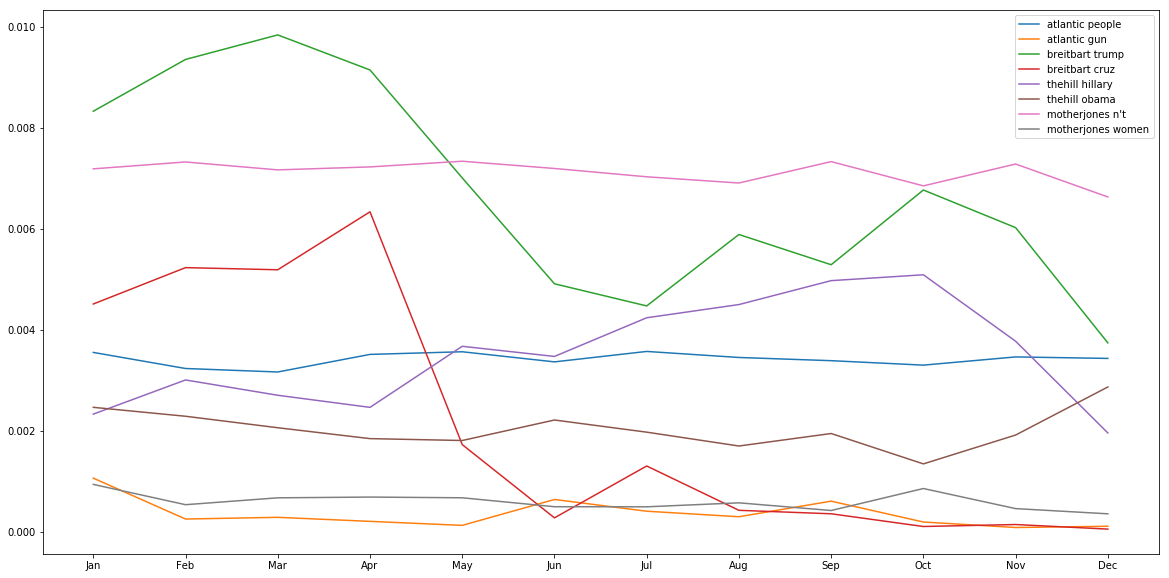

In [238]:
#plots freqs
fig,ax=plt.subplots(figsize=(20,10))
li=[]
la=[]
for j in site_list:
    word_list=sorted(list(dif_words[j]), key=lambda x: dif_words[j][x], reverse=True)[:2]
    for w in word_list:
        li.append(ax.plot(months,[freqs[j][month][w] for month in months])[0])
        la.append("{} {}".format(j,w))
ax.legend(li,la)

In [204]:
sorted(list(dif_words["atlantic"]), key=lambda x: dif_words["atlantic"][x], reverse=True)[:6]

['people', 'gun', 'work', 'guns', 'white', 'school']

In [203]:
sorted(list(dif_words["breitbart"]), key=lambda x: dif_words["breitbart"][x], reverse=True)[:6]

['trump', 'cruz', 'ted', 'born', 'fox', 'citizen']

In [202]:
sorted(list(dif_words["thehill"]), key=lambda x: dif_words["thehill"][x], reverse=True)[:6]

['hillary', 'obama', 'clinton', 'gop', 'president', 'http']

In [201]:
sorted(list(dif_words["motherjones"]), key=lambda x: dif_words["motherjones"][x], reverse=True)[:6]

["n't", 'women', 'would', 'bernie', 'sanders', 'people']

In [27]:
freqdifs=sorted(list(dif_words.keys()), key=lambda x: dif_words[x])
posdifs=sorted(list(diverg), key=lambda word: diverg[word][0])
[word for word in freqdifs[:10000:-1] if word in posdifs[:10000]]

NameError: name 'dif_words' is not defined

In [ ]:
year="2016"
n=["NN","NNP","NNPS","NNS"]
adjs=["JJ","JJR","JJS"]
noun_p=dd(lambda: dd(lambda: [[0,0]]*12))
adj_p=dd(lambda: dd(lambda: [0]*12))
#other_p=dd(lambda: dd(lambda: [0]*12))
direc="/home/banker/data/cleaner/"
#direc="../data/2016/"
months=["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
site_list=["atlantic","breitbart","thehill","motherjones"]
words=[]
        
num=0
ignore_list=[]
for i,month in enumerate(months):
    with open(direc+month+year+"stats.pkl","rb") as f:
        a=pickle.load(f)
        for word in a[1]["atlantic"][year][month].keys():
            num+=1
            for site in site_list:
                fr=a[0][site][year][month][word]
                if fr>10:
                    new_word=lemmat.lemmatize(word)
                    temp_n=(sum([a[1][site][year][month][word].freq(p) for p in n]),fr)
                    temp_a=sum([a[1][site][year][month][word].freq(p) for p in adjs])
                    dist1=[noun_p[site][new_word][i][0], adj_p[site][new_word][i]]
                    dist2=[temp_n[0], temp_a]
                    weight1=noun_p[site][new_word][i][1]
                    weight2=temp_n[1]
                    try:
                        noun_p[site][new_word][i][0],adj_p[site][new_word][i]=merge(dist1,dist2,weight1,weight2)
                    except:
                        print(word)
                        print(temp_n,temp_a)
                        exit()
                    if new_word!=word:
                        noun_p[site][new_word][i][1]+=temp_n[1]
                    #other_p[site][word][i]=sum([a[1][site][year][month][word].freq(p) for p in a[1][site][year][month][word].keys() if p not in n and p not in adjs])
                else:
                    ignore_list.append(word)
                    num-=1
                    break
            if num%1000==0:
                print(num)      
with open("../data/POSstats.pkl", "wb") as f:
    pickle.dump([noun_p, adj_p, ignore_list], f)

In [29]:
with open("../data/POSstats.pkl", "wb") as f:
    pickle.dump([noun_p, adj_p,ignore_list], f)

KeyboardInterrupt: 

In [20]:
with open("../data/POSstats.pkl", "rb") as f:
    [noun_p, adj_p, ignore_list]=pickle.load(f)

from kulkarni
Then we calculate the probability distribution of part of speech tags Q t given the word w
and time snapshot t as follows: Q t = Pr X∼POS Tags (X|w, C t ).
We consider the POS tag distribution at t = 0 to be the
initial distribution Q 0 . To quantify the temporal change
between two time snapshots corpora, for a specific word w,
we calculate the divergence between the POS distributions
in both snapshots.
Specifically, we construct the time series as follows:
T t (w) = JSD(Q 0 , Q t )

In [14]:
at_diverg=dd(lambda: [None]*11)
weights=np.array([0.5]*2)
dist_weights=np.array([0.5]*2)
for word in noun_p["atlantic"].keys():
    for i in range(11):
        dist1=np.array([noun_p["atlantic"][word][i],adj_p["atlantic"][word][i]])
        dist2=np.array([noun_p["atlantic"][word][i+1],adj_p["atlantic"][word][i+1]])
        if None in dist1 or None in dist2:
            continue
        at_diverg[word][i]=JSD([dist1,dist2],weights,dist_weights)

KeyboardInterrupt: 

In [24]:
with open("../data/at_diverge.pkl", "wb") as f:
    pickle.dump(at_diverg, f)

In [ ]:
#merges two probability distributions of POS, and normalizes so add to 100%
#weighted by frequency of word usage
def merge(dist1, dist2, weight1, weight2):
    a=[0]*2
    a[0]=(dist1[0]*weight1+dist2[0]*weight2)/(weight1+weight2)
    a[1]=(dist1[1]*weight1+dist2[1]*weight2)/(weight1+weight2)
    c_s=a[0]+a[1]
    m=1/c_s
    a=list(map(lambda x: x*m, a))
    return a

In [21]:
diverg=dd(lambda: [0]*12)
weights=np.array([0.5]*2)
key_list=["atlantic","breitbart"]
dist_weights=np.array([1/len(key_list)]*len(key_list))
for word in noun_p[key_list[0]].keys():
    for i in range(12):
        try:
            dists=[np.array([noun_p[key][word][i],adj_p[key][word][i]]) for key in key_list]
            diverg[word][i]=JSD(dists,weights,dist_weights)
        except:
            continue
s=sorted(list(diverg), key=lambda word: sum(diverg[word]), reverse=True)

/home/benjamin/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2507: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


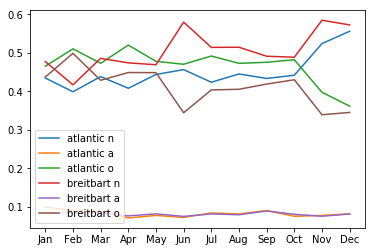

In [260]:
for i in ["atlantic", "breitbart"]:
    plt.plot(months,noun_p[i]["left"])
    plt.plot(months,adj_p[i]["left"])
    plt.plot(months,other_p[i]["left"])
plt.legend(["{} {}".format(site, pos) for site in ["atlantic", "breitbart"] for pos in ["n", "a", "o"]])

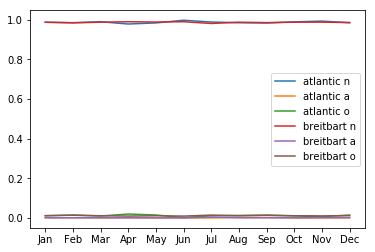

In [262]:
for i in ["atlantic", "breitbart"]:
    plt.plot(months,noun_p[i]["blacks"])
    plt.plot(months,adj_p[i]["blacks"])
    plt.plot(months,other_p[i]["blacks"])
plt.legend(["{} {}".format(site, pos) for site in ["atlantic", "breitbart"] for pos in ["n", "a", "o"]])

In [11]:
ignore_set=set(ignore_list)

In [17]:
noun_p["atlantic"]["launch"]

[0.717391304347826,
 0.8775510204081634,
 0.9076842381327039,
 0.7941176470588235,
 0.6333333333333333,
 0.6818181818181819,
 0.6666666666666666,
 0.7865266841644794,
 0.857078853046595,
 0.7143879742304939,
 0.851851851851852,
 0.5714285714285714]

In [18]:
noun_p["breitbart"]["launch"]

[0.7777777777777777,
 0.9144385026737967,
 0.8262078554049357,
 0.8333333333333334,
 0.9224137931034483,
 0.8791208791208791,
 0.8613861386138614,
 0.8473955647240845,
 0.8432592131861296,
 0.75853932832036,
 0.8318965517241379,
 0.7575757575757576]

In [24]:
list(enumerate([i for i in s if i not in ignore_set]))

[(0, 'launch'),
 (1, 'confirm'),
 (2, ''),
 (3, 'salari'),
 (4, 'contamin'),
 (5, 'reli'),
 (6, 'becom'),
 (7, 'differ'),
 (8, 'koolaid'),
 (9, 'greater'),
 (10, 'lie'),
 (11, 'parrot'),
 (12, 'factori'),
 (13, 'diagnosi'),
 (14, 'percentag'),
 (15, 'enumer'),
 (16, 'shut'),
 (17, 'consult'),
 (18, 'storm'),
 (19, 'beach'),
 (20, 'solut'),
 (21, 'gruesom'),
 (22, 'dengu'),
 (23, 'enmiti'),
 (24, 'countrysid'),
 (25, 'rampag'),
 (26, 'derang'),
 (27, 'clean'),
 (28, 'shine'),
 (29, 'moral'),
 (30, 'fish'),
 (31, 'pipe'),
 (32, 'avoid'),
 (33, 'specul'),
 (34, 'yield'),
 (35, 'altogeth'),
 (36, 'rapid'),
 (37, 'clarenc'),
 (38, 'telescop'),
 (39, 'dog'),
 (40, 'prejudic'),
 (41, 'law'),
 (42, 'dnc'),
 (43, 'viewpoint'),
 (44, 'school'),
 (45, 'patienc'),
 (46, 'gunfre'),
 (47, 'piss'),
 (48, 'parallel'),
 (49, 'prudenc'),
 (50, 'identifi'),
 (51, 'disgrac'),
 (52, 'fk'),
 (53, 'slaughter'),
 (54, 'someplac'),
 (55, 'idioci'),
 (56, 'hang'),
 (57, 'unholi'),
 (58, 'fundrais'),
 (59, 'sin'

In [129]:
months=["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

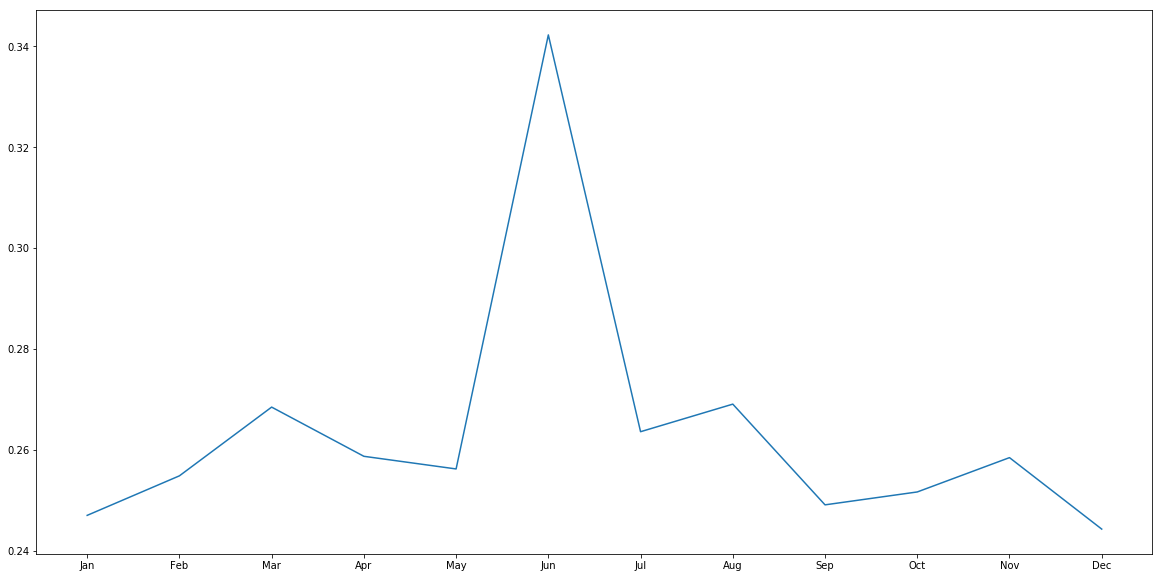

In [7]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(months,at_v_bb_diverg["black"])

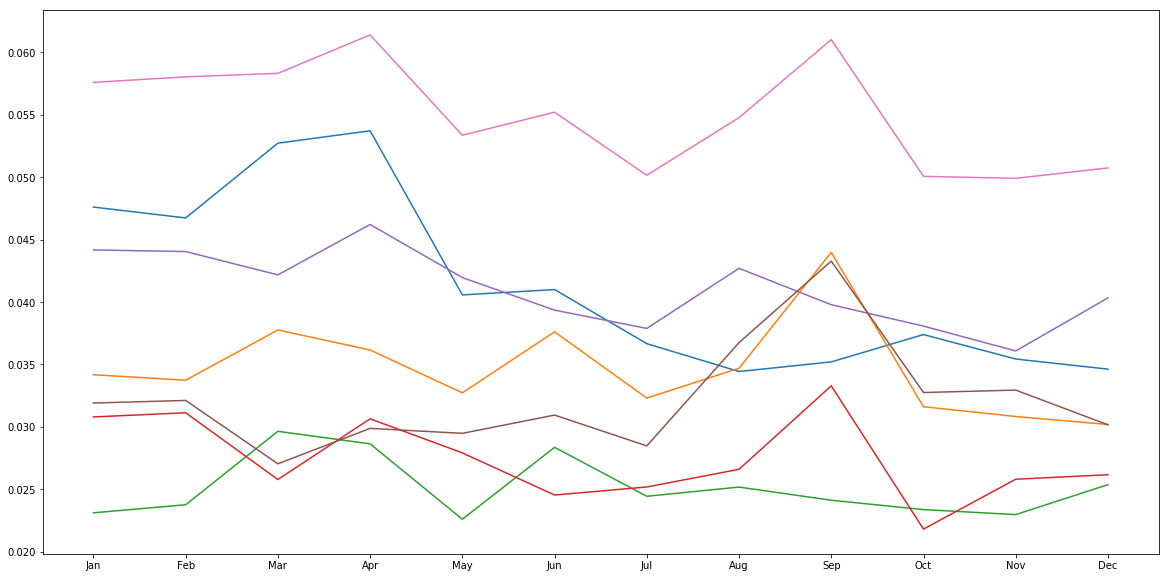

In [110]:
fig,ax=plt.subplots(figsize=(20,10))
for i in d:
    ax.plot(months,i)